In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import sqlite3

In [128]:
con = sqlite3.connect(r"D:\Study\Sharayu\REAL WORLD PROJECT  RESOURCES/password_data.sqlite")

In [129]:
data = pd.read_sql_query("SELECT * from Users",con)

In [130]:
data.shape

(100000, 3)

In [131]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


# Data Cleaning

In [132]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [133]:
##Remove irrelevant column
data.drop(['index'],axis = 1,inplace = True)

In [134]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [135]:
##Check duplicate 
data.duplicated().sum()

0

In [136]:
##Check null values
data.isnull().any()

password    False
strength    False
dtype: bool

In [137]:
data.isnull().any().sum()

0

In [138]:
##Check whether we have negative strength or not
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [139]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Data Analysis

In [140]:
data.columns

Index(['password', 'strength'], dtype='object')

In [141]:
data['password'][0]

'zxe870819'

In [142]:
type(data['password'][0])

str

In [143]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [144]:
##How many password texts have only numeric character
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [145]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [146]:
##How many password have upper case charcter 
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [147]:
data[data['password'].str.isupper()].shape

(1506, 2)

In [148]:
##How many password have alphabet only
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [149]:
data[data['password'].str.isalpha()].shape

(50, 2)

In [150]:
##How many password have alphanumerice character
data[data['password'].str.isalnum()].shape                      

(97203, 2)

In [151]:
##How many password have first letter in uppercase
data[data['password'].str.istitle()]         

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [152]:
data[data['password'].str.istitle()].shape         

(932, 2)

In [153]:
##Chech how many password have special character
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [154]:
import string

In [155]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [156]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass
        

In [157]:
data['password'].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [158]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [159]:
data[data['password'].apply(find_semantics)==1].shape

(2663, 2)

# Feature Engineering on password feature

In [160]:
data['password'].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [161]:
data['length'] = data['password'].str.len()

In [162]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [163]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [164]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [165]:
data['lowercase_freq'] = np.round(data['password'].apply(freq_lowercase), 3)
data['uppercase_freq']= np.round(data['password'].apply(freq_uppercase), 3)
data['digit_freq'] = np.round(data['password'].apply(freq_numerical_case), 3)

In [166]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174


In [167]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)              

In [168]:
data['special_char_freq'] = np.round(data['password'].apply(freq_special_case), 3)

In [169]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1


In [170]:
data['special_char_freq'] = data['special_char_freq']/data['length']

In [171]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [172]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [173]:
data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [174]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [175]:
##Plot a boxplot
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

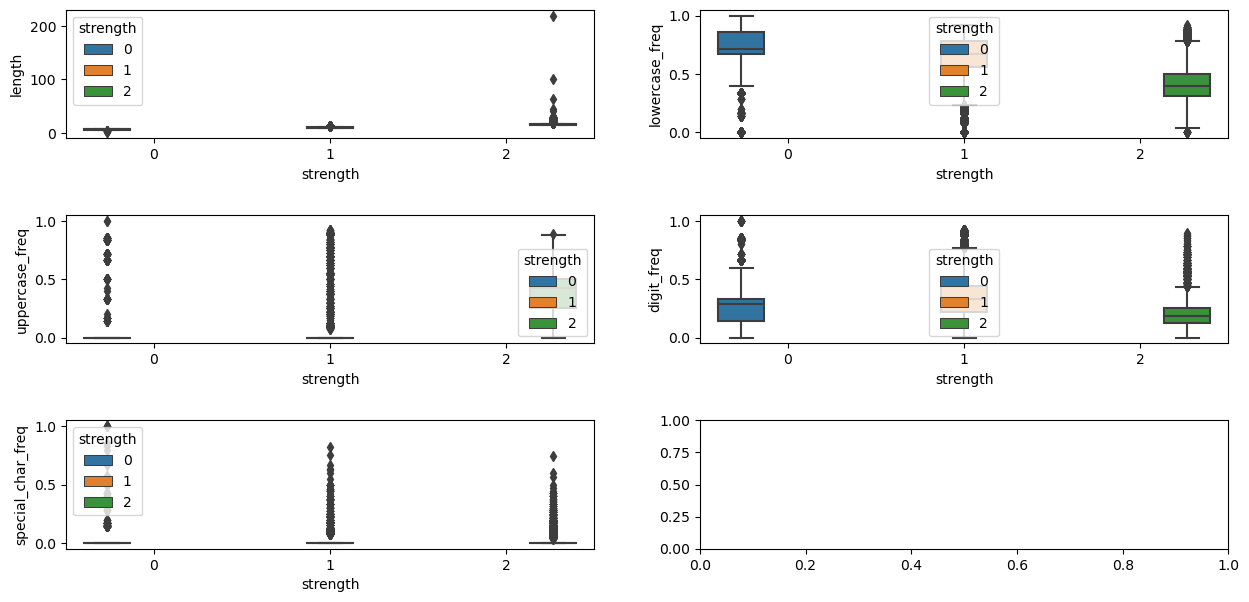

In [176]:
fig, ((ax1,ax2) , (ax3,ax4) , (ax5,ax6)) = plt.subplots(3,2,figsize = (15,7))

sns.boxplot(x = 'strength', y = 'length', hue = 'strength', data = data, ax = ax1)
sns.boxplot(x = 'strength', y = 'lowercase_freq', hue = 'strength', data = data, ax = ax2)
sns.boxplot(x = 'strength', y = 'uppercase_freq', hue = 'strength', data = data, ax = ax3)
sns.boxplot(x = 'strength', y = 'digit_freq', hue = 'strength', data = data, ax = ax4)
sns.boxplot(x = 'strength', y = 'special_char_freq', hue = 'strength', data = data, ax = ax5)

plt.subplots_adjust(hspace = 0.6)

# #Feature Engineering
# Univariate Analysis

In [177]:
def get_dist(data,feature):
    
    plt.figure(figsize = (10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x= 'strength',y = feature,data = data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color = 'red',label ='0',hist = False )
    sns.distplot(data[data['strength']==0][feature],color = 'blue',label ='1',hist = False)
    sns.distplot(data[data['strength']==0][feature],color = 'orange',label ='2',hist = False ) 
    plt.legend()
    plt.show()

In [178]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

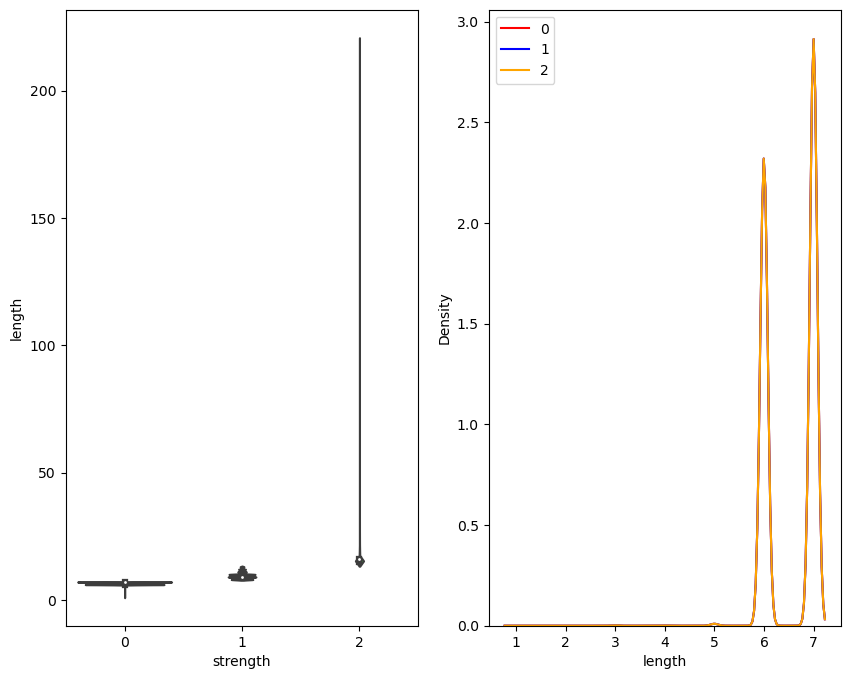

In [179]:
get_dist(data,'length')

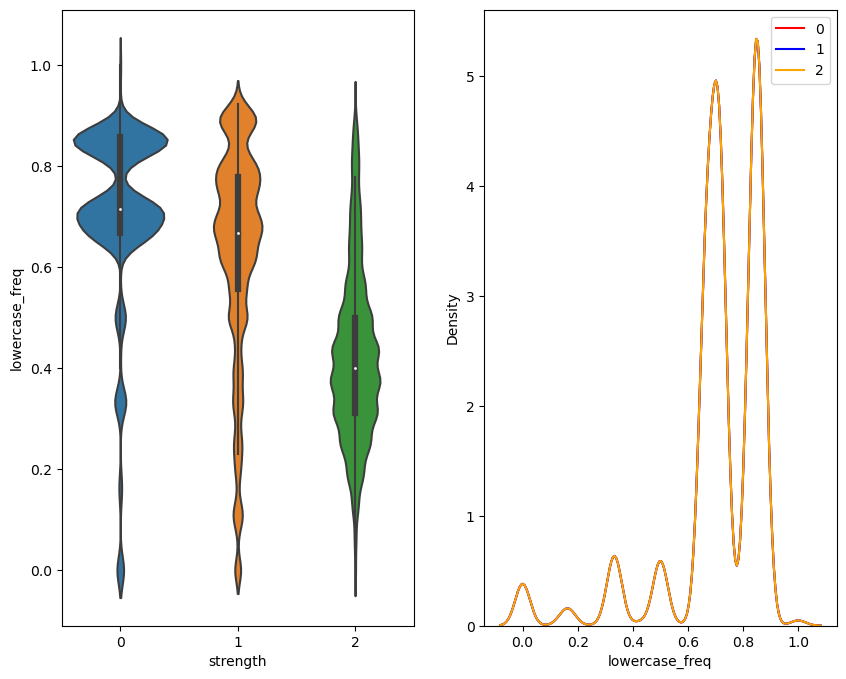

In [180]:
get_dist(data,'lowercase_freq')

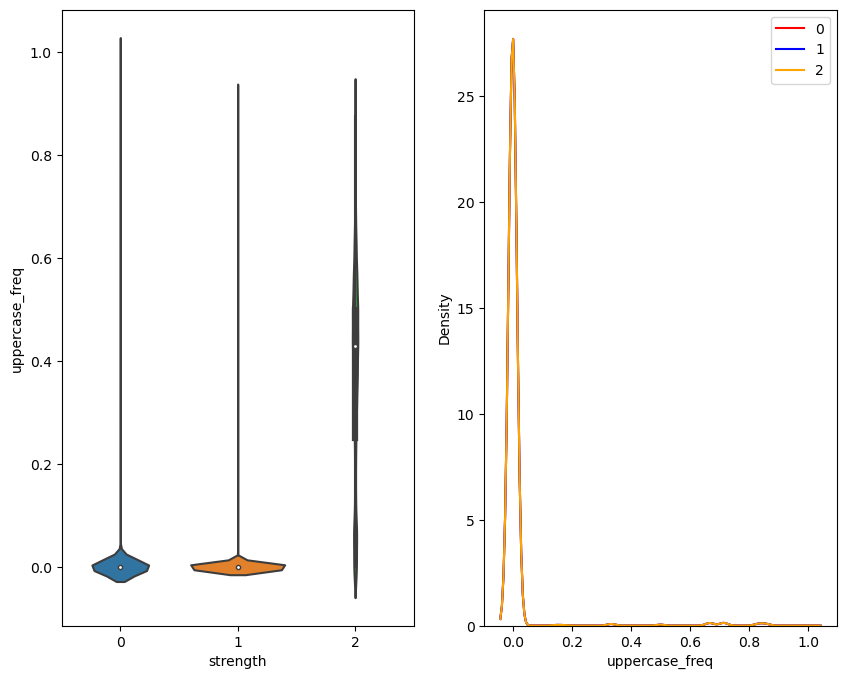

In [181]:
get_dist(data,'uppercase_freq')

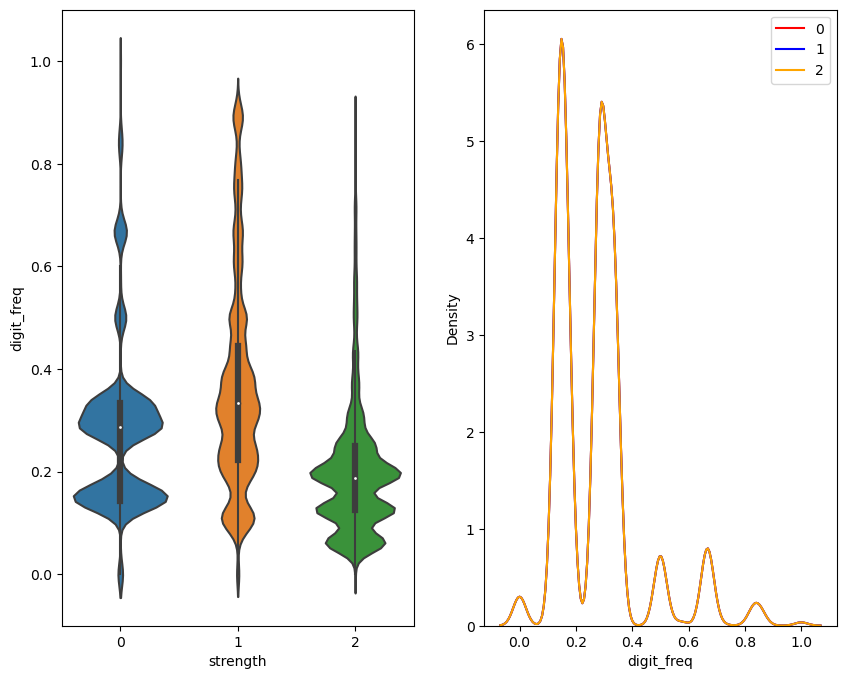

In [182]:
get_dist(data,'digit_freq')

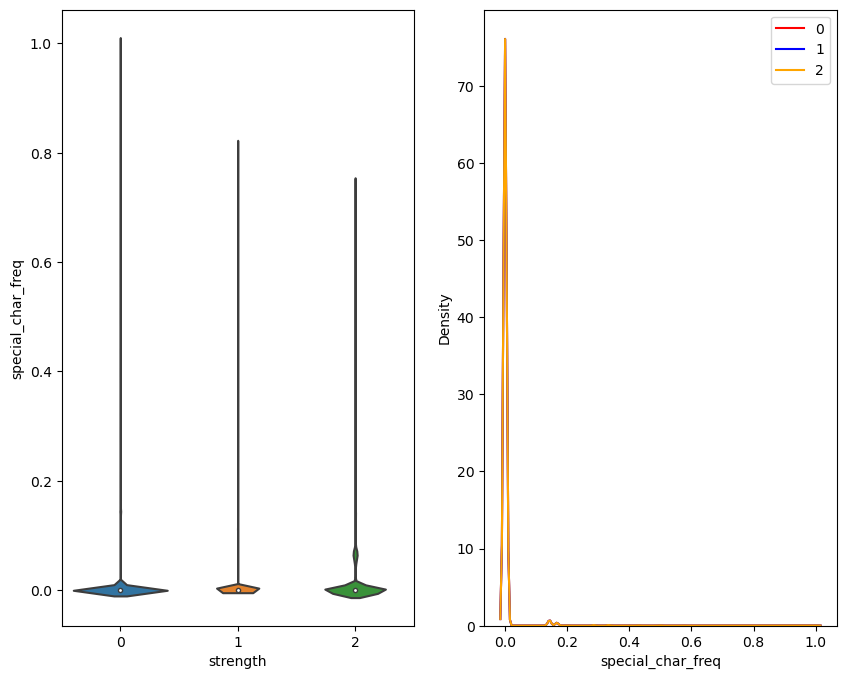

In [183]:
get_dist(data,'special_char_freq')

In [184]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [185]:
##Shuffling
dataframe = data.sample(frac = 1)

In [186]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
28253,macbook2010,1,11,0.636,0.000,0.364,0.0
77967,dick19920609,1,12,0.333,0.000,0.667,0.0
16857,yerandy123,1,10,0.700,0.000,0.300,0.0
32443,good4u,0,6,0.833,0.000,0.167,0.0
21063,pmjiyngu10,1,10,0.800,0.000,0.200,0.0
...,...,...,...,...,...,...,...
94690,5345qrqe62,1,10,0.400,0.000,0.600,0.0
69543,lucklove123,1,11,0.727,0.000,0.273,0.0
51285,eHLA36DM4NAwSMVL,2,16,0.125,0.688,0.188,0.0
84146,46746819hy,1,10,0.200,0.000,0.800,0.0


# NLP Algotithm

In [187]:
x = list(dataframe['password'])

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [189]:
vectorizer = TfidfVectorizer(analyzer='char')

In [190]:
X = vectorizer.fit_transform(x)

In [191]:
X.shape

(100000, 99)

In [192]:
dataframe['password'].shape

(100000,)

In [193]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [194]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5262508 , 0.20186499, 0.23354801, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19440323, 0.32589354, 0.30449714,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.30103175, 0.        , 0.26866456,
       0.        , 0.47775251, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [196]:
dataframe['password']

28253         macbook2010
77967        dick19920609
16857          yerandy123
32443              good4u
21063          pmjiyngu10
               ...       
94690          5345qrqe62
69543         lucklove123
51285    eHLA36DM4NAwSMVL
84146          46746819hy
52253           wegawo499
Name: password, Length: 100000, dtype: object

In [197]:
len(vectorizer.get_feature_names_out())

99

In [198]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [199]:
df2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [200]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']


In [202]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


# Applying Machine Learning Model

In [203]:
y = dataframe['strength']

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df2,y, test_size = 0.20)

In [206]:
X_train.shape

(80000, 101)

In [207]:
y_train.shape

(80000,)

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
clf = LogisticRegression(multi_class = 'multinomial')

In [210]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [211]:
y_pred = clf.predict(X_test)

In [212]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [213]:
from collections import Counter

In [214]:
Counter(y_pred)

Counter({1: 16961, 0: 1394, 2: 1645})

# Doing Predictions

In [217]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix = np.append(sample_matrix.toarray(),(length_pass, length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)
    
    if result == 0:
        return "Password is Weak"
    elif result == 1:
        return "Password is Normal"
    else: 
        return "Password is Strong"

In [218]:
predict()

Enter a password : sdfhgh


'Password is Weak'

# Checking Accuracy Score

In [223]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [224]:
accuracy_score(y_test,y_pred)

0.7973

In [225]:
confusion_matrix(y_test,y_pred)

array([[  702,  2053,     2],
       [  606, 13889,   288],
       [   86,  1019,  1355]], dtype=int64)

In [226]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.34      2757
           1       0.82      0.94      0.88     14783
           2       0.82      0.55      0.66      2460

    accuracy                           0.80     20000
   macro avg       0.72      0.58      0.62     20000
weighted avg       0.78      0.80      0.77     20000

